In [1]:
from pyscf import scf, gto, lib, fci, mcscf, cc
import numpy as np
import matplotlib.pyplot as plt

In [47]:
def genh2(r):
    return [('H', [0.0, 0.0, 0.0]), ('H', [0.0, 0.0, r])]

def genmol(r, basis='aug-ccpvqz', **kwargs):
    return gto.M(atom=genh2(r), basis=basis, symmetry=False, **kwargs)


In [48]:
dists=np.linspace(0.07,5,100)
nuc_energies = []
relec_energies = []
for r in dists:
    mol = genmol(r, verbose=0)
    mol.incore_anyway=True
    mf = mol.HF().run()
    print('r', r, 'HF energy:', mf.e_tot)
    mycc = mf.CISD()
    mycc.direct = True
    mycc.kernel()
    print('r', r, 'CISD correlation energy =', mycc.e_corr)
    nuc_energies.append(mf.energy_nuc())
    relec_energies.append(mf.energy_elec()[0]+mycc.e_corr)

r 0.07 HF energy: 4.749462804464316
r 0.07 CISD correlation energy = -0.0402453812394243
r 0.11979797979797979 HF energy: 1.6794710324736597
r 0.11979797979797979 CISD correlation energy = -0.03991691112719595
r 0.16959595959595958 HF energy: 0.46697640241967875
r 0.16959595959595958 CISD correlation energy = -0.039551101005574865
r 0.2193939393939394 HF energy: -0.15310620467141822
r 0.2193939393939394 CISD correlation energy = -0.039219572460681605
r 0.2691919191919192 HF energy: -0.5119954340801633
r 0.2691919191919192 CISD correlation energy = -0.03895697828111389
r 0.31898989898989893 HF energy: -0.7346093656385202
r 0.31898989898989893 CISD correlation energy = -0.03877250808624324
r 0.3687878787878788 HF energy: -0.8783526870488163
r 0.3687878787878788 CISD correlation energy = -0.03865973232789787
r 0.41858585858585856 HF energy: -0.9732041250052141
r 0.41858585858585856 CISD correlation energy = -0.03862010969953698
r 0.46838383838383835 HF energy: -1.0362590891534729
r 0.4683

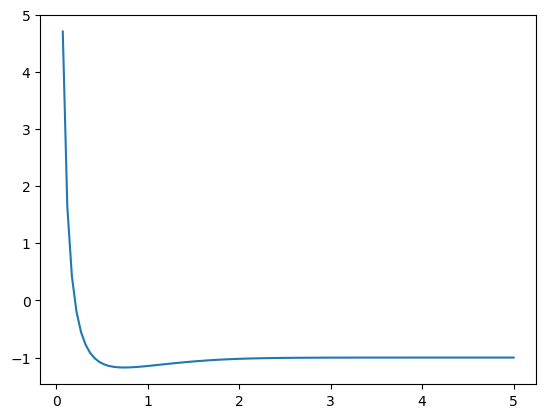

In [54]:
nuc_energies = np.asarray(nuc_energies)
relec_energies = np.asarray(relec_energies)
#uelec_energies = np.asarray(uelec_energies)

#min_energies = np.minimum(relec_energies,uelec_energies)
plt.plot(dists, relec_energies+nuc_energies)

In [51]:
he=gto.M(atom='He 0 0 0', basis='aug-ccpv5z', symmetry=True, verbose=0).HF()

he.run()

hecc = he.CISD().run()
he_energy = hecc.e_tot

In [58]:
EH=data.nist.HARTREE2EV

In [60]:
he_energy*EH

-79.00011030276448

In [57]:
from pyscf import data

In [59]:
np.savez('h2dissoc.npz', dists=dists, elec=relec_energies*EH, nuc=nuc_energies*EH)

In [66]:
oneH=gto.M(atom='H 0 0 0', basis='aug-ccpv5z', symmetry=True, verbose=0, spin=1).HF()
oneH.kernel()
print(oneH.e_tot*EH)

-13.605551091294029


(-0.46761634137505587, 1.0)

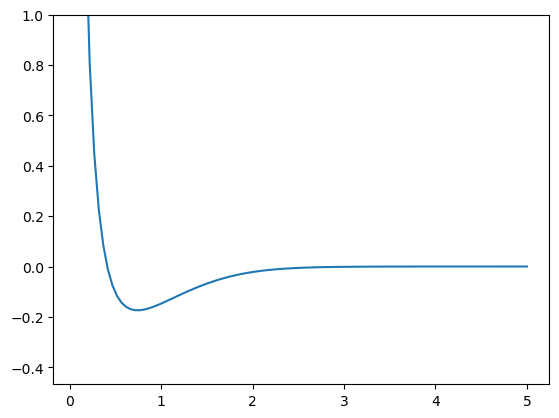

In [71]:
plt.plot(dists, relec_energies+nuc_energies-2*oneH.e_tot)
plt.ylim(ymax=1)